In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import sin
from math import tan
from scipy.optimize import curve_fit
from math import sqrt

Сначала необходимо построить график исходной функции по выборке из файла lab1.csv.
Для этого данные считываются из файла, заносятся в массив и сортируются.

In [6]:
data=[]
with open('lab1.csv') as f:
    for line in f:
        data.append([float(x) for x in line.split()])

data.sort()
    
N=len(data)
x=[]
y=[]
for i in range(len(data)):
    x.append(float(data[i][0]))
    y.append(float(data[i][1]))

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5), dpi=150)
ax.scatter(x, y, marker = 'o', c = 'r', edgecolor = 'r')
ax.plot(x, y, 'r', label="f(x)")
ax.set_xlim(-10,10)
ax.set_ylim(-100,50)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.grid()
plt.show()

Проанализиров данный график, можно предложить методику поиска наилучшего аппроксиматора. Сначала можно выделить у исходного графика следующие свойства: периодичность (что сразу наводит на мысль о дальнейшем использовании тригонометрических функций), изменение амплитуды (этого можно будет достигнуть введением полиномов) и симметричность графика относительно оси Y. Наличие крайнего свойства приводит к идее использовать для аппроксимации исходного графика функцию вида sin⋅(полином нечетной степени)+cos⋅(полином четной степени).

Сначала будут перечислены все шаги, а ниже построены графики и выведены результаты, соответствующие им.
Первая функция, которая будет рассматриваться, реализована функцией func и имеет вид np.sin(a⋅x+b)⋅(c⋅x^3+d⋅x^2+e⋅x+f)+np.cos(g⋅x+h)⋅(i⋅x^2+j⋅x+k). Как можно заметить, она имеет 11 параметров.
Для нее с помощью функции curve_fit рассчитаны значения этих параметров и среднеквадратичная ошибка.

Следующий шаг - обнуление параметров, использование которых бессмысленно, и их значения близки к нулю. Это параметры b и h.
Новая рассматриваемая функция (func2) имеет вид np.sin(a⋅x)⋅(b⋅x^3+c⋅x^2+d⋅x+e)+np.cos(f⋅x)⋅(g⋅x^2+h⋅x+i) и 9 параметров.
Для нее проделаны аналогичные действия и замечено, что погрешность намного уменьшилась.

Результаты этих шагов приведены ниже.

In [5]:
def func(x, a, b, c, d, e, f, g, h, i, j, k):
    return np.sin(a*x+b)*(c*x**3+d*x**2+e*x+f)+np.cos(g*x+h)*(i*x**2+j*x+k)

def func2(x, a, b, c, d, e, f, g, h, i):
    return (np.sin(a*x)*(b*x**3+c*x**2+d*x+e)+np.cos(f*x)*(g*x**2+h*x+i))

def error(y,err):
    w=0
    for i in range(N):
        r = (y[i]-err[i])**2
        w = w + r
    smd=sqrt(w/N) 
    return(smd)

solution = curve_fit(func, x, y)[0]
solution2 = curve_fit(func2, x, y)[0]

err=np.copy(x)
for i in range(40):
    err[i]=func(x[i],*solution)

err2=np.copy(x)
for i in range(40):
    err2[i]=func2(x[i],*solution2)

smd = error(y,err)
print('Параметры для f1(x): ', solution,'\n','Среднеквадратичная ошибка для f1(x) = ',smd,'\n\n')
smd2 = error(y,err2)
print('Параметры для f2(x): ', solution2,'\n','Среднеквадратичная ошибка для f2(x) = ',smd2,'\n\n')


x1=np.linspace(-10.,10.,40,endpoint=True)
y1=np.copy(x1)
for i in range(40):
    y1[i]=func(x1[i],*solution)

y2=np.copy(x1)
for i in range(40):
    y2[i]=func2(x1[i],*solution2)


fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5), dpi=150)
ax.scatter(x, y, marker = 'o', c = 'r', edgecolor = 'r')
ax.plot(x, y, 'r', label="Исходная функция f(x)")
ax.plot(x1, y1, 'orange', label="Аппроксимирующая функция f1(x)")
ax.plot(x1, y2, 'b', label="Аппроксимирующая функция f2(x)")
ax.set_xlim(-10,10)
ax.set_ylim(-100,100)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend(loc='upper left')
ax.grid()
plt.show()

Параметры для f1(x):  [ 1.01370844  0.03276486 -0.19642462  0.1318142   0.83200611 -0.83957321
  1.59852631  0.0583642   0.39791644 -0.38120725  0.65855663] 
 Среднеквадратичная ошибка для f1(x) =  2.8447601387598604 


Параметры для f2(x):  [ 8.10159296e-01 -3.37789469e-04  2.70868795e-04  2.44173742e-09
 -3.79318128e-09  8.10318669e-01 -1.06000000e+00  8.50000000e-01
 -4.77607322e-11] 
 Среднеквадратичная ошибка для f2(x) =  8.44649615403198e-09 




Далее были реализованы 2 идеи. Во-первых, для полинома 3 степени может не быть необходимо наличия всех слагаемых, поэтому в силу малости параметров d и e они были обнулены. Во-вторых, изменение знака перед косинусом, так как это больше похоже на исходную функцию. В результате этих действий погрешность изменилась несильно, но количество параметров стало равно 7. Функция func3 имеет вид: np.sin(a⋅x)⋅(b⋅x^3+c⋅x^2)+np.cos(d⋅x)⋅(e⋅x^2+f⋅x+g).

После этого были обнулены переменные c и g по причинам, описанным выше. Это уменьшило не только число параметров (оно стало равно 5), но и ошибку. func4 имеет вид np.sin(a⋅x)⋅(b⋅x^3)-np.cos(c⋅x)⋅(d⋅x^2+e⋅x).

Параметр b - очень маленький, поэтому его можно обнулить, что, в свою очередь, приведет к обнулинению всего первого слагаемого.
Итоговая аппроксимирующая функция, зависящая всего от 3 параметров, имеет вид: -np.cos(b⋅x)⋅(c⋅x^2+d⋅x) или -np.cos(0.81⋅x)⋅(1.06⋅x^2-0.85⋅x).

Так как погрешности для функций 2, 3 и 4 несильно отличаются, то ниже приведены все численные результаты, но графики только для выборочных функций.

Параметры для f3(x):  [ 1.00438184e+00 -7.64603094e-10 -1.86471226e-09  8.10000000e-01
  1.05999999e+00 -8.50000011e-01  3.34128171e-08] 
 Среднеквадратичная ошибка для f3(x) =  4.5087312483002624e-08 


Параметры для f4(x):  [ 8.11974932e-01 -1.40730777e-09  8.10000001e-01  1.06000000e+00
 -8.50000001e-01] 
 Среднеквадратичная ошибка для f4(x) =  2.9575555217389888e-08 


Параметры для f5(x):  [ 0.81  1.06 -0.85] 
 Среднеквадратичная ошибка для f5(x) =  5.167988310951415e-14


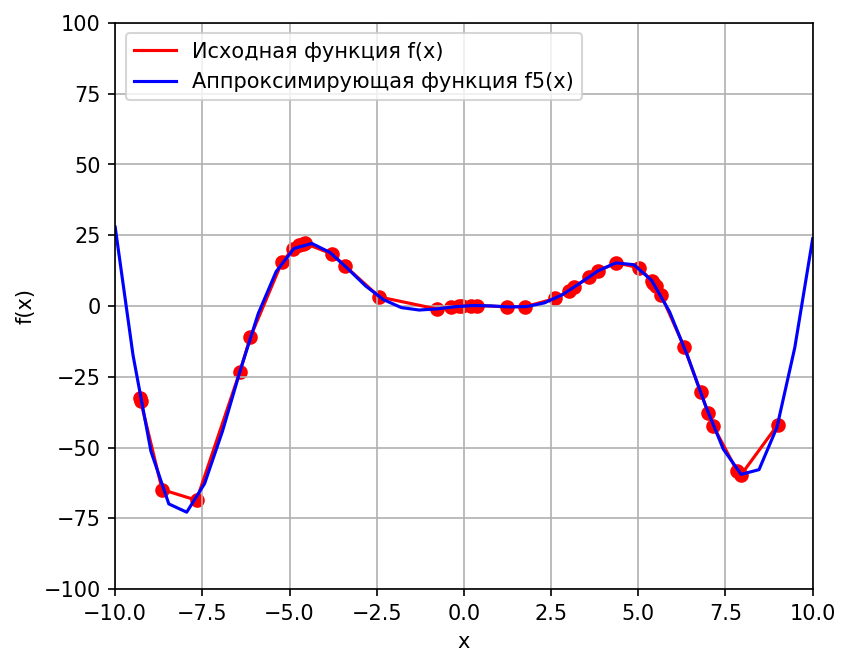

In [4]:
def func3(x, a, b, c, d, e, f, g):
    return (np.sin(a*x)*(b*x**3+c*x**2)-np.cos(d*x)*(e*x**2+f*x+g))

def func4(x, a, b, c, d, e):
    return (np.sin(a*x)*(b*x**3)-np.cos(c*x)*(d*x**2+e*x))

def func5(x, b, c, d):
    return (-np.cos(b*x)*(c*x**2+d*x))

solution3 = curve_fit(func3, x, y)[0]
solution4 = curve_fit(func4, x, y)[0]
solution5 = curve_fit(func5, x, y)[0]

err3=np.copy(x)
for i in range(40):
    err3[i]=func3(x[i],*solution3)

err4=np.copy(x)
for i in range(40):
    err4[i]=func4(x[i],*solution4)

err5=np.copy(x)
for i in range(40):
    err5[i]=func5(x[i],*solution5)

smd3 = error(y,err3)
print('Параметры для f3(x): ', solution3,'\n','Среднеквадратичная ошибка для f3(x) = ',smd3,'\n\n')
smd4 = error(y,err4)
print('Параметры для f4(x): ', solution4,'\n','Среднеквадратичная ошибка для f4(x) = ',smd4,'\n\n')
smd5 = error(y,err5)
print('Параметры для f5(x): ', solution5,'\n','Среднеквадратичная ошибка для f5(x) = ',smd5)

y3=np.copy(x1)
for i in range(40):
    y3[i]=func3(x1[i],*solution3)

y4=np.copy(x1)
for i in range(40):
    y4[i]=func4(x1[i],*solution4)

y5=np.copy(x1)
for i in range(40):
    y5[i]=func5(x1[i],*solution5)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 5), dpi=150)
ax.scatter(x, y, marker = 'o', c = 'r', edgecolor = 'r')
ax.plot(x, y, 'r', label="Исходная функция f(x)")
ax.plot(x1, y5, 'b', label="Аппроксимирующая функция f5(x)")
ax.set_xlim(-10,10)
ax.set_ylim(-100,100)
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.legend(loc='upper left')
ax.grid()
plt.show()

Ответ: функция, наиболее точно аппроксимирующая начальную выборку, имеет вид -np.cos(0.81⋅x)⋅(1.06⋅x^2-0.85⋅x).
Погрешность 5.062⋅e^-14